## Notes on the Ammonia model ##

Exact equation from the [source code](https://github.com/pyspeckit/pyspeckit/blob/master/pyspeckit/spectrum/models/ammonia.py#L210):

            population_upperstate = lin_ntot * orthoparafrac * partition/(Z.sum())

            tau_dict[linename] = (population_upperstate /
                                  (1. + np.exp(-h*frq/(kb*tkin) ))*ccms**2 /
                                  (8*np.pi*frq**2) * aval *
                                  (1-np.exp(-h*frq/(kb*tex))) /
                                  (width/ckms*frq*np.sqrt(2*np.pi)) )


\begin{equation}
    \tau = N_{tot} g_{opr} Z_{upper} \frac{A_{ij} c^2}{8\pi\nu^2} 
    \left(1-\exp{ \frac{-h \nu}{k_B T_{ex}} } \right)
    \left(1+\exp{\frac{-h \nu}{k_B T_K}}\right)
    \left((2\pi)^{1/2} \nu \sigma_\nu / c\right)^{-1}
\end{equation}

Equation 16 from Rosolowsky et al 2008:

$$N(1,1) = \frac{8 \pi k \nu_0^2}{h c^3} \frac{1}{A_{1,1}} \sqrt{2\pi}\sigma_\nu (T_{ex}-T_{bg})\tau$$

Rearranges to:

$$\tau = N(1,1) \frac{h c^3}{8\pi k \nu_0^2} A_{1,1} \frac{1}{\sqrt{2 \pi} \sigma_\nu} \left(T_{ex}-T_{bg})\right)^{-1}$$

Equation A4 of Friesen et al 2009:

$$N(1,1) = \frac{8\pi\nu^2}{c^2} \frac{g_1}{g_2} \frac{1}{A_{1,1}} \frac{1+\exp\left(-h\nu_0/k_B T_{ex}\right)}{1-\exp\left(-h \nu_0/k_B T_{ex}\right)} \int \tau(\nu) d\nu$$

Equation 98 of Mangum & Shirley 2015:


$$N_{tot} = \frac{3 h}{8 \pi \mu^2 R_i} \frac{J_u(J_u+1)}{K^2} 
\frac{Q_{rot}}{g_J g_K g_I} \frac{\exp{E_u/k_B T_{ex}}}{\exp{h \nu/k_B T_{ex}} - 1} 
\left[\frac{\int T_R dv}{f\left(J_\nu(T_{ex})-J_\nu{T_B}\right) }\right]$$

## From Scratch ##

$$\tau_\nu = \int \alpha_\nu ds$$
$$\alpha_\nu = \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left(1-\frac{g_l n_u}{g_u n_l}\right) \phi_\nu$$

Excitation temperature:
$$T_{ex} \equiv \frac{h\nu_0/k_b}{\ln \frac{n_l g_u}{n_u g_l} } $$

$\nu_0$ = rest frequency of the line

Rearranges to:
$$ \frac{n_l g_u}{n_u g_l} = \exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)$$

Boltzman  distribution:
$$ \frac{n_u}{n_l} = \frac{g_u}{g_l} \exp\left(\frac{-h \nu_0}{k_B T}\right)$$
where T is a thermal equilibrium temperature

Rearranges to:
$$ 1-\frac{n_u g_l}{n_l g_u} = 1-\exp\left(\frac{-h \nu_0}{k_B T}\right)$$


Column Density 
$$N_u \equiv \int n_u ds$$
$$N_l \equiv \int n_l ds$$

Starting to substitute previous equations into each other:

$$\tau_\nu d\nu= \alpha_\nu d\nu = \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left(1-\frac{g_l n_u}{g_u n_l}\right) \phi_\nu d\nu$$

$$\frac{g_u}{g_l}N_l = N_u\exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)$$

First substitution is the Boltzmann distribution, with $T_{ex}$ for T
$$\int \tau_\nu d\nu = \int \frac{c^2}{8\pi\nu_0^2} \frac{g_u}{g_l} n_l A_{ul} \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right] \phi_\nu d\nu $$

Second is the $N_l$ - $N_u$ relation:
$$\int \tau_\nu d\nu = \frac{c^2}{8\pi\nu_0^2}  A_{ul} N_u\left[\exp\left(\frac{h \nu_0}{k_B T_{ex}}\right)\right] \left[  1-\exp\left(\frac{-h \nu_0}{k_B T}\right) \right] \int \phi_\nu d\nu $$

Then some simplification:
$$\int \tau_\nu d\nu = \frac{c^2}{8\pi\nu_0^2}  A_{ul} N_u \left[  \exp\left(\frac{h \nu_0}{k_B T}\right) - 1 \right] \int \phi_\nu d\nu $$

$$A_{ul} = \frac{64\pi^4\nu_0^3}{3 h c^3} \left|\mu_{lu}\right|^2$$

Becomes, via some manipulation, equation 29 of Mangum & Shirley 2015:
$$N_u = \frac{3 h c}{8\pi^3 \nu \left|\mu_{lu}\right|^2} \left[\exp\left(\frac{h\nu}{k_B T_{ex}}\right) -1\right]^{-1} \int \tau_\nu d\nu$$
where I have used $T_{ex}$ instead of $T$ here because that is one of the substitutions invoked (quietly) in their derivation.  There is some sleight-of-hand regarding assuming $N_l = n_l$ that essentially assumes $T_{ex}$ is constant along the line of sight, but that is fine.

(Equation 30 is the same as this one, but with $dv$ instead of $d\nu$ units)

Solve for tau again (because that's what's implemented in the code):

$$\mathrm{"tau"} = \int \tau_\nu d\nu = N_u \frac{
c^2 A_{ul}}{8\pi\nu_0^2} \left[\exp\left(\frac{h\nu}{k_B T_{ex}}\right) -1\right] $$

The key difference from Erik's derivation is that this is $N_u$, but he has defined $N_{(1,1)}= N_u + N_l$.

So, we get $N_l$ the same way as above:
$$N_l = \frac{8\pi\nu_0^2}{c^2} \frac{g_l}{g_u} A_{ul}^{-1} \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right]^{-1} \int \tau d\nu$$

$$N_l = \frac{3 h c}{8 \pi^3 \nu \left|\mu_{lu}\right|^2} \frac{g_l}{g_u}  \left[  1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right) \right]^{-1} \int \tau d\nu$$

Added together:
$$N_u + N_l = \frac{3 h c}{8 \pi^3 \nu \left|\mu_{lu}\right|^2} \frac{\frac{g_l}{g_u}  +\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)}{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} \int \tau d\nu$$

We can solve that back for tau, which is what Erik has done:

$$\int \tau d\nu = (N_u + N_l) \frac{8 \pi^3 \nu \left|\mu_{lu}\right|^2}{3 h c} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {\frac{g_l}{g_u}  +\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

$$=(N_u + N_l) \frac{g_u}{g_l}\frac{8 \pi^3 \nu \left|\mu_{lu}\right|^2}{3 h c} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

$$=(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

now identical to Erik's equation.

This is actually a problem, because $N_u$ is related to $N_{tot}$ via the partition function, but there is some double-counting going on if we try to relate $N_{(1,1)}$ to $N_{tot}$ with the same equation.

So, to reformulate the equations in pyspeckit using the appropriate values, we want to use both the partition function (calculated using $T_{kin}$) and $N_u$.

Eqn 31:
    

$$N_u = N_{tot} \frac{g_u}{Q_{rot}} \exp\left(\frac{-E_u}{k_B T_{kin}}\right)$$

is implemented correctly in pyspeckit:

    population_upperstate = lin_ntot * orthoparafrac * partition/(Z.sum())

where ``partition`` is 

$$Z_i = (2J + 1) \exp\left[ \frac{ -h (B_0 J (J+1) + (C_0-B_0)J^2)}{k_B T_{kin}}\right]$$

...so I'm assuming (haven't checked) that $E_u = h (B_0 J (J+1) + (C_0-B_0)J^2)$

Some numerical checks: How bad was the use of Tkin instead of Tex in the $\tau$ equation?

$$(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

In [2]:
from astropy import units as u
from astropy import constants
freq = 23*u.GHz
def tau_wrong(tkin, tex):
    return (1-np.exp(-constants.h * freq/(constants.k_B*tkin)))/(1+np.exp(-constants.h * freq/(constants.k_B*tex)))
def tau_right(tex):
    return (1-np.exp(-constants.h * freq/(constants.k_B*tex)))/(1+np.exp(-constants.h * freq/(constants.k_B*tex)))

In [18]:
tkin = np.linspace(5,40,101)*u.K
tex = np.linspace(5,40,100)*u.K

In [19]:
grid = np.array([[tau_wrong(tk,tx)/tau_right(tx) for tx in tex] for tk in tkin])

In [20]:
%matplotlib inline
import pylab as pl

/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


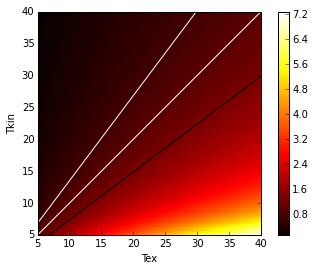

In [21]:
pl.imshow(grid, cmap='hot', extent=[5,40,5,40])
pl.xlabel("Tex")
pl.ylabel("Tkin")
pl.colorbar()
pl.contour(tex, tkin, grid, levels=[0.75,1,1/0.75], colors=['w','w','k'])

So the error could be 50%-700% over a somewhat reasonable range.  That's bad, and it affects the temperature estimates.

But, is this error at all balanced by the double-counting problem?

Because we were using the partition function directly, it's not obvious.  I was assuming that we were using the equation with $N_u$ as the leader, but we were using $N_u+N_l$.  i.e., I was using this equation:

$$\int \tau d\nu =(N_u + N_l) \frac{g_u}{g_l}\frac{A_{ul}c^2}{8\pi\nu_0^2} \frac{1-\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} {1  +\frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T_{ex}}\right)} $$

but with $N_u$ in place of $N_u + N_l$.

The magnitude of the error can therefore be estimated by computing $(N_u+N_l)/N_u = 1 + \frac{N_l}{N_u}$.

We can use the Boltzmann distribution to compute this error, then:
$$ \frac{n_u}{n_l} = \frac{g_u}{g_l}\exp\left(\frac{-h \nu_0}{k_B T}\right)$$


In [24]:
def nunlnu_error(Tkin):
    return 1+np.exp(-constants.h * freq / (constants.k_B * Tkin))

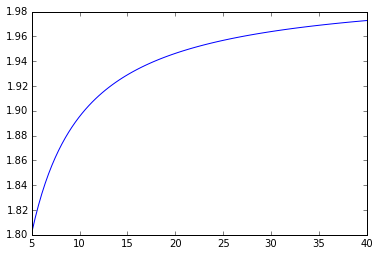

In [25]:
pl.plot(tkin.value, nunlnu_error(tkin))

So we were always off by a factor very close to 2.  The *relative* values of $\tau$ should never have been affected by this issue.